In [6]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob





In [7]:
 #motion field ->optical flow
 #ground truth kell
#images path
path=glob.glob("Synthetic_MICCAI2020_dataset/Video_01/images/*.png")
path2=glob.glob("Synthetic_MICCAI2020_dataset/Video_02/images/*.png")
path3=glob.glob("Synthetic_MICCAI2020_dataset/Video_03/images/*.png")
path4=glob.glob("Synthetic_MICCAI2020_dataset/Video_04/images/*.png")
path5=glob.glob("Synthetic_MICCAI2020_dataset/Video_05/images/*.png")
path6=glob.glob("Synthetic_MICCAI2020_dataset/Video_06/images/*.png")
path7=glob.glob("Synthetic_MICCAI2020_dataset/Video_07/images/*.png")
path8=glob.glob("Synthetic_MICCAI2020_dataset/Video_08/images/*.png")
#ground truth path
ground_truth_path=glob.glob("Synthetic_MICCAI2020_dataset/Video_01/ground_truth/*.png")
ground_truth_path2=glob.glob("Synthetic_MICCAI2020_dataset/Video_02/ground_truth/*.png")
ground_truth_path3=glob.glob("Synthetic_MICCAI2020_dataset/Video_03/ground_truth/*.png")
ground_truth_path4=glob.glob("Synthetic_MICCAI2020_dataset/Video_04/ground_truth/*.png")
ground_truth_path5=glob.glob("Synthetic_MICCAI2020_dataset/Video_05/ground_truth/*.png")
ground_truth_path6=glob.glob("Synthetic_MICCAI2020_dataset/Video_06/ground_truth/*.png")
ground_truth_path7=glob.glob("Synthetic_MICCAI2020_dataset/Video_07/ground_truth/*.png")
ground_truth_path8=glob.glob("Synthetic_MICCAI2020_dataset/Video_08/ground_truth/*.png")
#first 10 image into imgs array
def get_images(path):
    imgs=[]
    
    for img in path[:10]:
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
    return imgs

#images into gray color
def to_gray(imgs):
    grays=[]
    for img in imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grays.append(gray)
    return grays
#first 10 ground truth into ground truth array
def get_ground_truth(path):
    ground_truth=[]
    for img in path[:10]:    
        img=cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ground_truth.append(img)
        
    return ground_truth









In [8]:
def get_corners(prev,current):
 #featrue detection parameters
 featrue_params=dict(maxCorners=5,
                      qualityLevel=0.3,
                      minDistance=6,
                      blockSize=7
                      )
 k=0.004
 #Kanade-Lucas opical flow parameters
 lk_params=dict(winSize=(15,15), #search window of each pyramdid level
                 maxLevel=0, #number of pyramids levels
                 criteria=(cv2.TermCriteria_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)) 
 prev_img=prev 
 #find corners in previous image
 #Shi_tomasi corner detection
 prev_pts=cv2.goodFeaturesToTrack(prev_img,mask=None,**featrue_params)
 #print(prev_pts)

 current_img=current
 #track corners from previous image to current image
 #Kanade-Lucas optical flow
 current_pts,status,err=cv2.calcOpticalFlowPyrLK(prev_img,current_img,prev_pts,None,**lk_params)
 
 #select good points
 if current_pts is not None:
    good_new = current_pts[status==1]
    good_old = prev_pts[status==1]
 prev_corners=np.intp(good_old)
 current_corners=np.intp(good_new)
 return prev_corners,current_corners,featrue_params['maxCorners']


speed_values=[]
def calculate_speed(prev,current):
 prev_corners,current_corners,maxCorners=get_corners(prev,current)
 speed = np.mean(np.linalg.norm((current_corners[:,:1]-prev_corners[:,:1])**2 -(current_corners[:,1:]-prev_corners[:,1:])**2 , axis=1))
 speed_squared=np.sqrt(speed) # négyzetes átlagos sebesség
 #mean value of the Euclidan norm(nagyság)
 speed_values.append(speed_squared)
 return speed_squared

 
           

 



In [9]:
#plotting corners
def plot_corners(prev,current,prev_out,current_out):
    prev_corners,current_corners,maxCorners=get_corners(prev,current)
    speed=calculate_speed(prev,current)
    #previous image
    if(len(prev_corners)<=maxCorners): 
     for pts in prev_corners:
        x,y= pts.ravel()
        cv2.circle(prev_out,(x,y),5,255,3)
    #current image
    if(len(current_corners)<=maxCorners):
        for pts in current_corners:
         x,y= pts.ravel()
         cv2.circle(current_out,(x,y),5,255,3)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1),plt.imshow(prev_out)
    plt.title('Previous'),plt.xticks([]),plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(current_out)
    plt.title('Current'), plt.xticks([]), plt.yticks([])
    plt.suptitle("Speed is : %s"%str(speed) )
    plt.draw(),plt.show()
    #print(maxCorners)

def plot_speed(speed_values):
    
    plt.plot(speed_values)
    plt.xlabel('Frame number')
    plt.ylabel('Speed')
    plt.title('Speed values first 10 frames')
    plt.show()
               

     


    

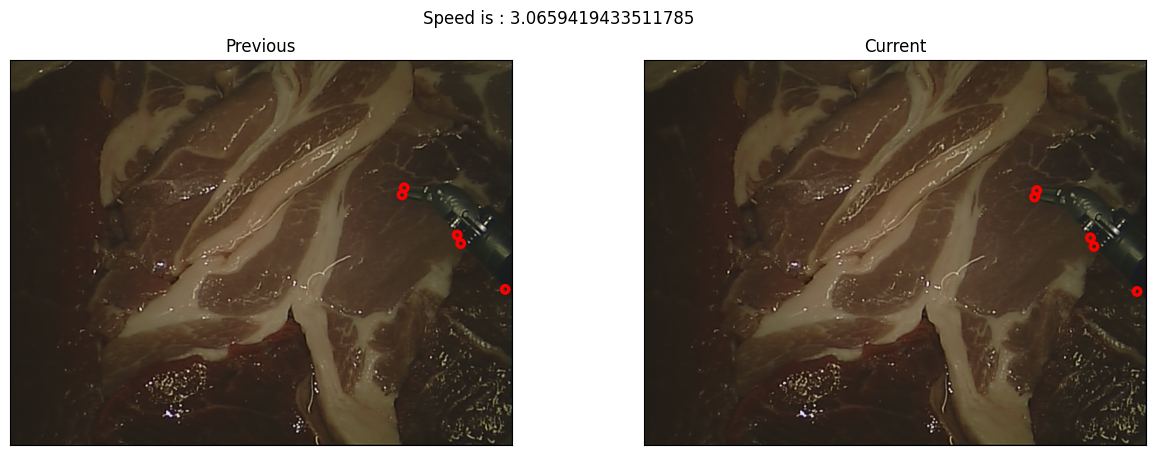

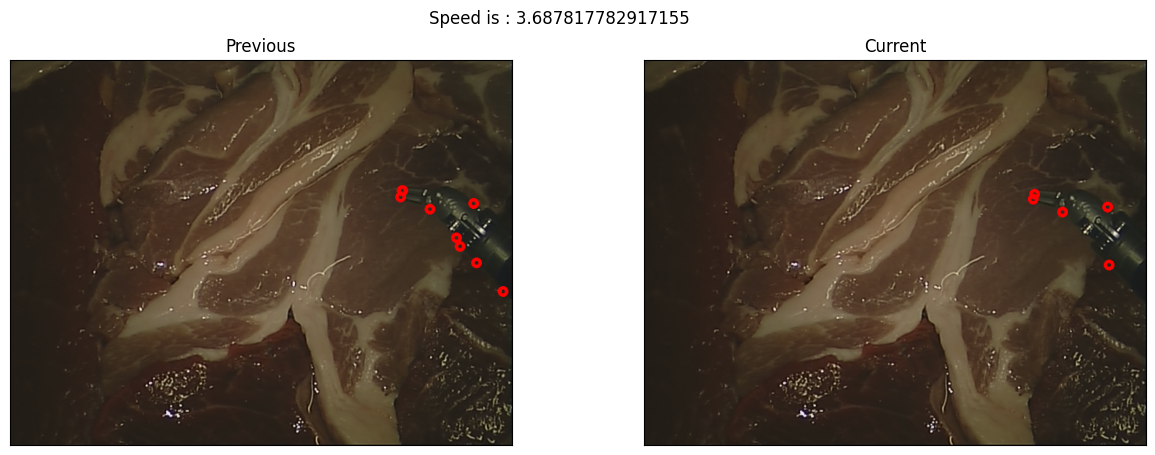

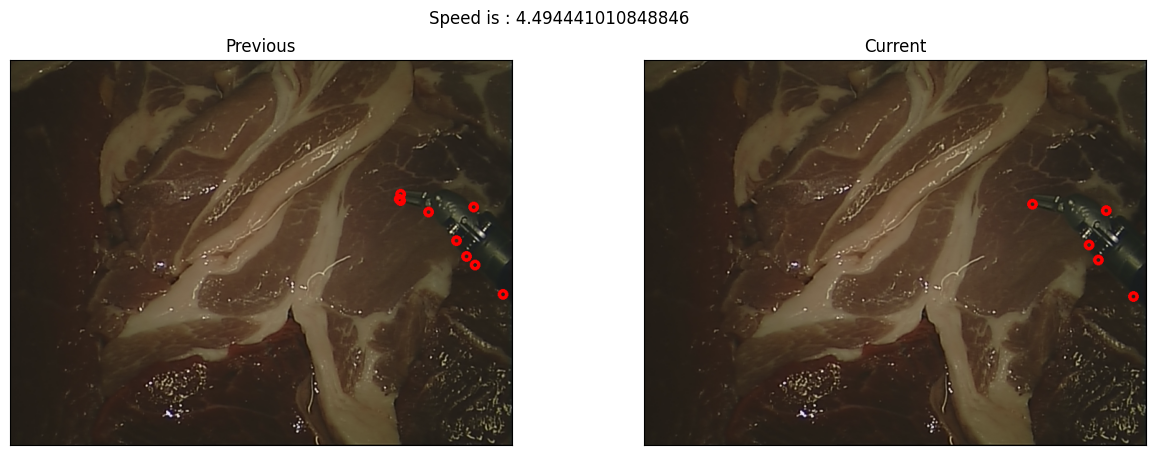

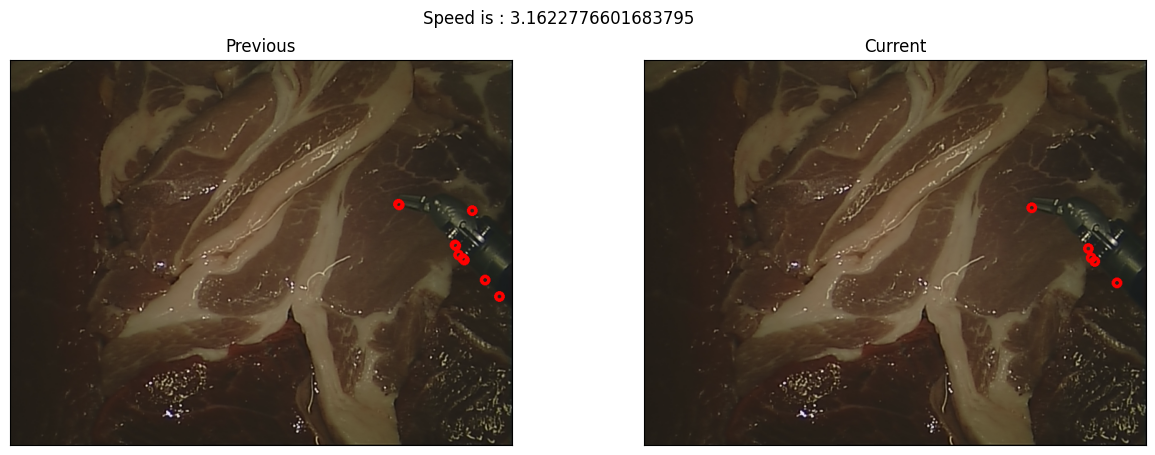

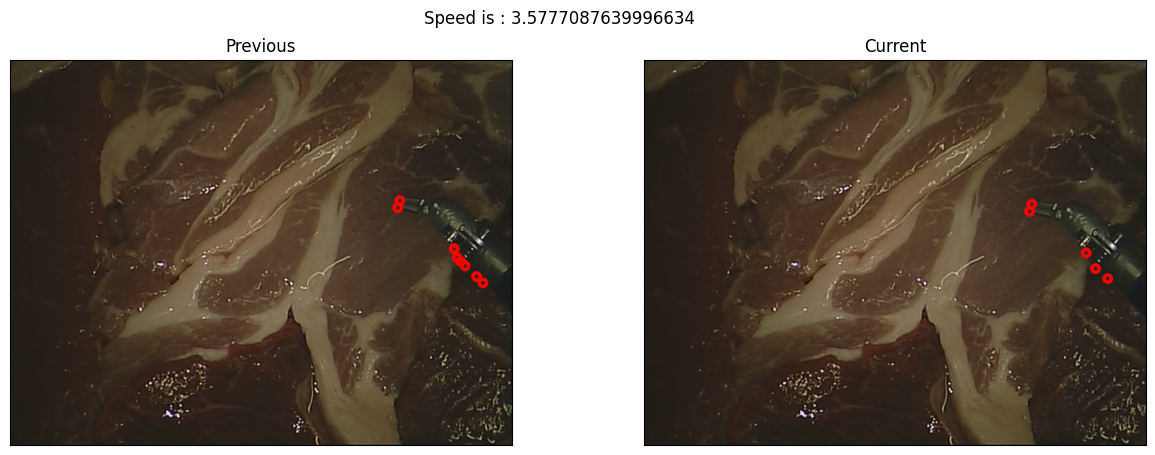

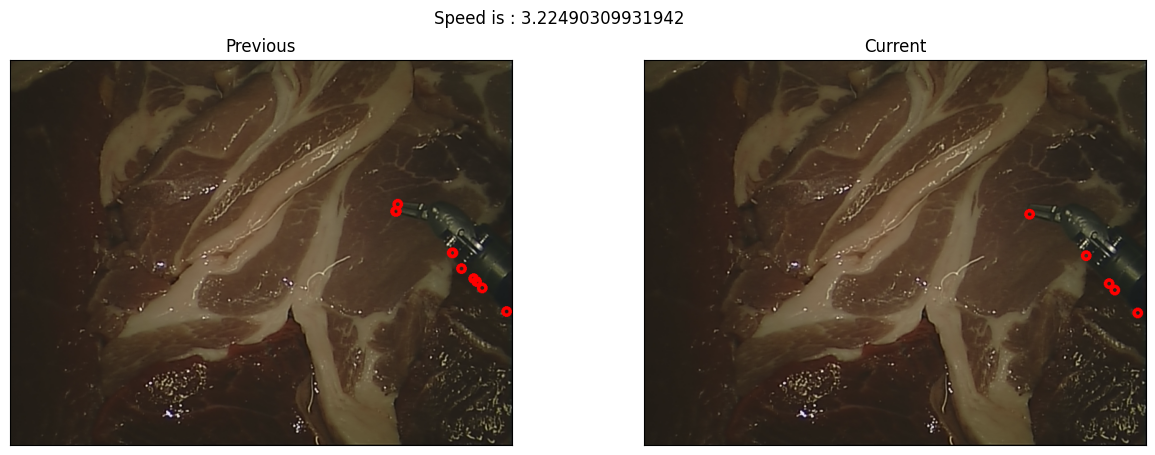

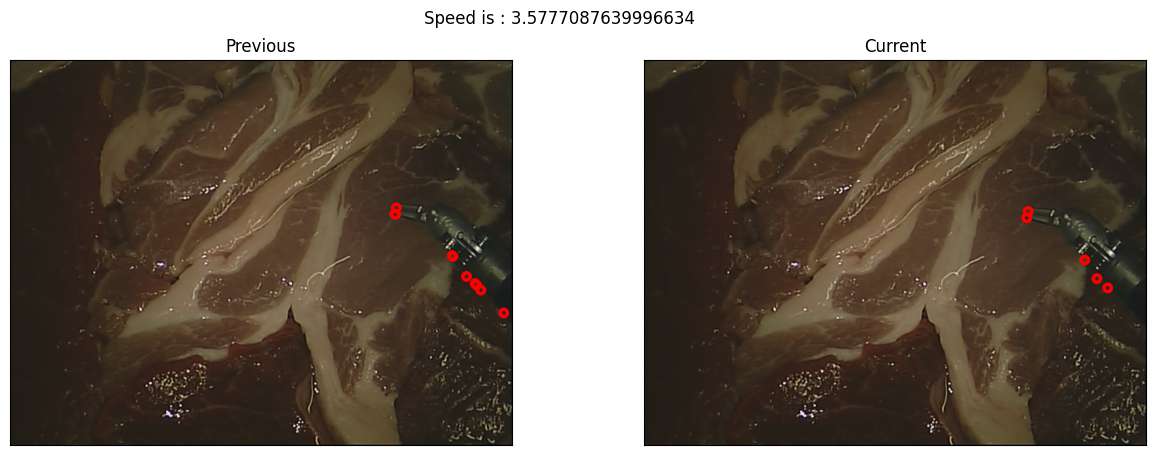

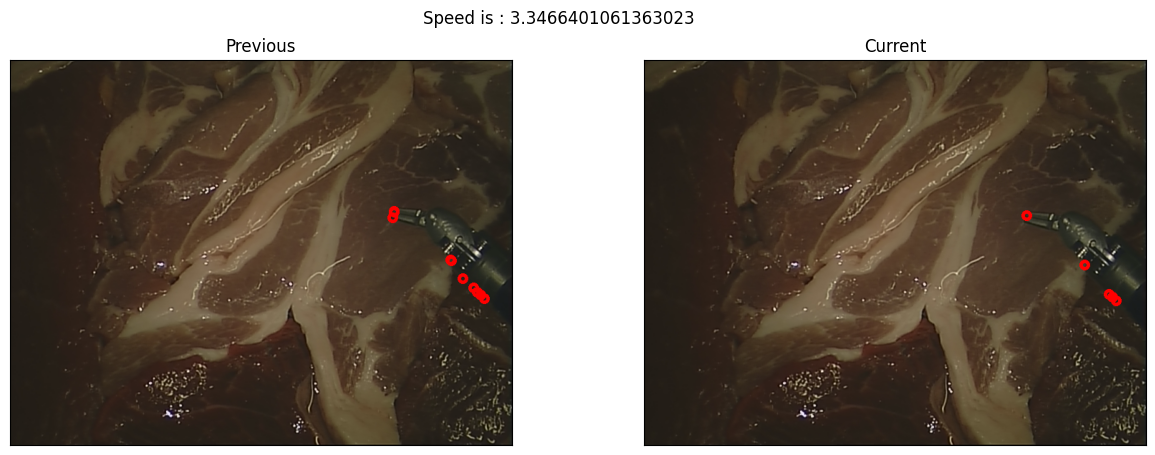

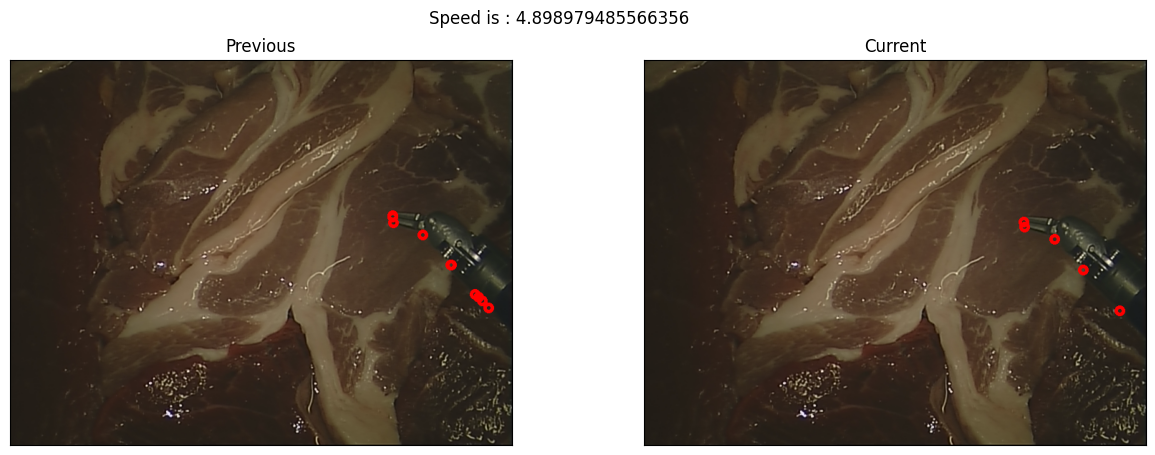

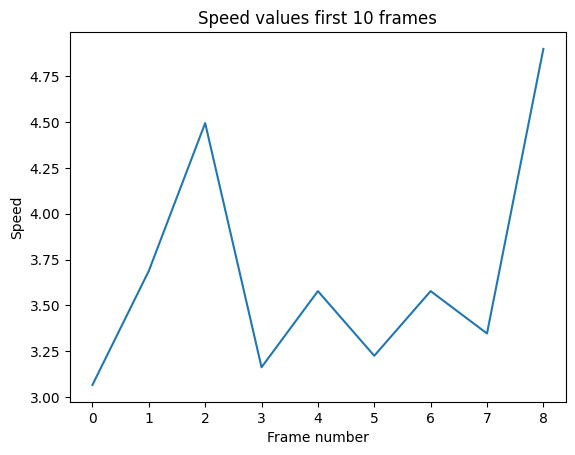

[3.0659419433511785, 3.687817782917155, 4.494441010848846, 3.1622776601683795, 3.5777087639996634, 3.22490309931942, 3.5777087639996634, 3.3466401061363023, 4.898979485566356]


In [10]:
#Testing

imgs=get_images(path3)
ground_truth=get_ground_truth(ground_truth_path3)
#gray=to_gray(imgs)
gray=to_gray(ground_truth)
for i in range(len(imgs)-1):
 plot_corners(gray[i],gray[i+1],imgs[i],imgs[i+1]) 

plot_speed(speed_values)
print(speed_values)

